In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_alpine_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Pinene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.106952
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.106952
2,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.106952
3,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.106952
4,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.106952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42967,0.175310,0.233013,0.002148,0.114778,0.056574,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59996,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59997,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..Alpha-Pinene'], axis = 1)
y = df_mlp[['X..Alpha-Pinene']]

<AxesSubplot:ylabel='Count'>

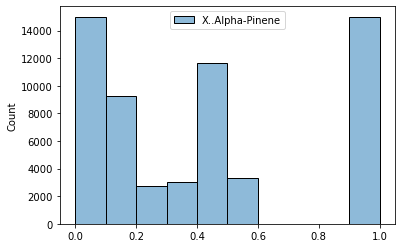

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.08290327926750637

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.8973345823940929

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.8647775420065618

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([6.98740005e-02, 4.65310765e-02, 5.64203157e-02, 6.99375631e-02,
       6.46146284e-02, 2.94340947e-03, 3.62248702e-01, 4.67595722e-03,
       6.09273406e-06, 7.95373890e-04, 8.40555787e-03, 2.77333334e-08,
       8.67668533e-03, 8.32974580e-06, 1.51982685e-03, 1.77714544e-03,
       5.55940868e-03, 1.12045219e-03, 5.24986243e-08, 1.23851481e-02,
       5.69552749e-08, 5.50482408e-08, 4.96131413e-03, 3.14650196e-03,
       5.62713871e-03, 2.85372669e-04, 1.85279256e-02, 4.01284715e-06,
       2.00545719e-08, 1.39773356e-03, 1.69484872e-02, 1.17345596e-08,
       3.33680627e-03, 3.70758380e-07, 9.53871833e-08, 5.15673624e-03,
       4.39689167e-03, 2.13374949e-03, 1.68992640e-04, 2.06910096e-05,
       1.66680639e-04, 6.94641662e-03, 4.08549204e-05, 3.58228738e-02,
       1.43434954e-04, 1.64114135e-03, 2.11229635e-04, 6.42106212e-05,
       1.24207133e-03, 8.45795998e-04, 3.84878486e-03, 3.47503294e-02,
       9.74521225e-04, 5.48101851e-04, 1.57253541e-03, 1.38402796e-04,
      

In [16]:
selector.threshold_

0.011627906976744186

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,euphoric,hungry,relaxed,blueberry,earthy,mango
0,0.341025,0.182753,0.008214,0.140406,-0.156943,0,1,1,1,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,0,1,1,1,0,0,0
2,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,1,0,1,0,0,0
3,0.261225,0.100324,-0.043622,0.141860,-0.034786,0,1,1,0,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.175310,0.233013,0.002148,0.114778,0.056574,1,0,0,1,0,0,0
59996,0.440634,-0.078839,0.085152,0.087878,-0.133604,1,0,0,0,0,0,0
59997,0.184573,-0.137296,-0.095301,0.181735,-0.042683,1,0,0,0,0,0,0
59998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,1,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'indica',
 'euphoric',
 'hungry',
 'relaxed',
 'blueberry',
 'earthy',
 'mango']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_alpine.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_alpine.pkl")

['selected_X_mlp_lsa_elbow_alpine.pkl']

In [23]:
# import joblib

# selected_X = joblib.load("selected_X_mlp_lsa_elbow_alpine.pkl")

Train test split (after Feature Selection)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [25]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [26]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.11930652581497116

In [28]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.811201633601936

In [29]:
#val
r2_score(y_val, y_pred_mlpreg)

0.7982468202924011

Hyperparameter Tuning

In [30]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [31]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [32]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [33]:
rscv.best_params_

{'max_iter': 500, 'hidden_layer_sizes': (50, 50, 50), 'activation': 'tanh'}

In [34]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_alpine.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_alpine.pkl")

['rscv_mlp_lsa_elbow_best_params_alpine.pkl']

MLP fit (after hyperparameter tuning)

In [35]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=500, activation = 'tanh', hidden_layer_sizes= (50,50,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.07442493801326293

In [37]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.9185291564846102

In [38]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.9012027188454466

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [39]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [40]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_alpine.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_alpine.pkl")

['y_test_mlpreg_lsa_elbow_alpine.pkl']

In [41]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.07496877065962919

In [42]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.013307755099851179

In [43]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.11535924366885897

In [44]:
r2_score(y_test, y_pred_mlpreg_test)

0.9004737233492619

Error analysis

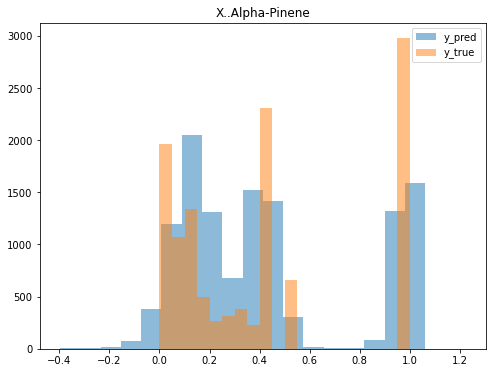

<Figure size 432x288 with 0 Axes>

In [45]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_alpine.png')

Pearson R

In [46]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.949
P-value: 0.000


<AxesSubplot:>

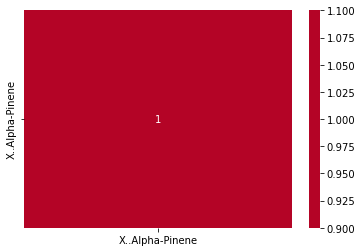

In [47]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)